# Table of Contents
## 1 Import Libraries
## 2 Import data set 
## 3 Relationshps to explore
    Hypothesis
### 4 Cleaning data 
    Missing values, duplicate check, extreme values check 
### 5 Prepare data for regression analysis
    - Scatterplot 
    - Independent and dependent variables 
    - Split the data 
### 6 Regression Analysis     
    - Fit the model to the training set 
    - Create a prediction for y on the test set 
    - Create a plot that shows the regression line on the test set 
    - Model performance statistics 
    - Compare the predicted y values with the actual y values 

# 1 Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# 2 Import CWUR data set

In [2]:
#Path 
path = r'C:\Users\ctede\OneDrive\Desktop\World University Rankings Analysis'

In [3]:
#Data set 
CWUR = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'CWUR_new_cols.pkl'))

In [4]:
#Check data set columns 
CWUR.head()

,world_rank,university_name,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,region,Rank Category
0,1,Harvard University,United States,1,7,9,1,1,1,1,5,100.00,2012,North America,Top 50
1,2,Massachusetts Institute of Technology,United States,2,9,17,3,12,4,4,1,91.67,2012,North America,Top 50
2,3,Stanford University,United States,3,17,11,5,4,2,2,15,89.50,2012,North America,Top 50
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Europe,Top 50
4,5,California Institute of Technology,United States,4,2,29,7,37,22,22,18,85.21,2012,North America,Top 50


In [5]:
#Check shape 
CWUR.shape

(2200, 15)

# 3 Relationships to Explore

I chose to use the world rank variable, instead of the score variable because I did not observe any potential linear scatterplots when plotting the score variable with the various indicators. Specifically, I will be doing a regression analysis on the world rank and the publications variable. The publications variable refers to the combined number of articles, where the quality of the journal is weighted. Although the world rank variable is not as intuitive as looking at the score variable, I only observed linearity when looking at the world rank variable. 
- World rank and the publications variable 
- World rank and the quality of faculty variable (weighted number of faculty members of a university who have won awards, medals, and prizes)
    - The quality of faculty variable had an almost horizontal scatterplot (until the data points started to disperse) with the world rank variable. I will also look at the relationship between the score and the quality of faculty variable because this scatterplot also stood out. 

## Hypothesis 

The number of publications by a university does not affect the world rank for that university. In other words, the ranking for a university does not depend on the number of published articles. 

# 4 Cleaning Data 

### Missing values check

In [6]:
#Create a subset of variables of interest: world rank, publications, quality of faculty, score 
columns = ["world_rank", "publications", "quality_of_faculty", "score"]

In [7]:
#subset 
CWUR_sub = CWUR[columns]

In [8]:
CWUR_sub.head()

,world_rank,publications,quality_of_faculty,score
0,1,1,1,100.00
1,2,12,3,91.67
2,3,4,5,89.50
3,4,16,4,86.17
4,5,37,7,85.21


In [9]:
CWUR_sub.shape

(2200, 4)

In [10]:
#Check for missing values 
CWUR_sub.isnull().sum() #no missing values

world_rank            0
publications          0
quality_of_faculty    0
score                 0
dtype: int64

### Duplicate values

In [12]:
dups = CWUR_sub.duplicated()
dups.shape #no full duplicates

(2200,)

### Check for extreme values

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='world_rank', ylabel='Density'>

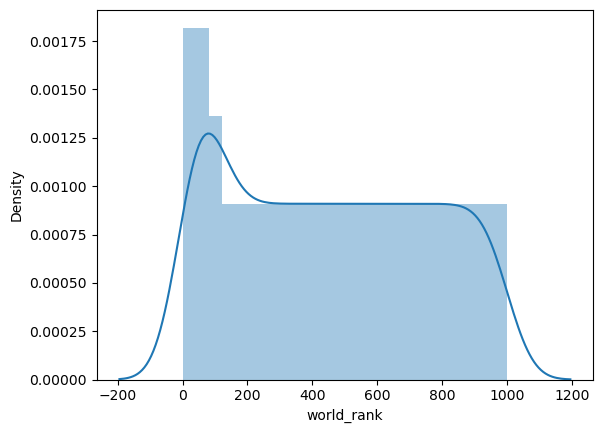

In [13]:
#Check for extreme values for the world_rank variable 
sns.distplot(CWUR_sub['world_rank'],bins=25)

Majority of the universities have world ranks between 0 and around 100. The maximum rank possible is 1000 and this density plot is consistent with that. 

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='publications', ylabel='Density'>

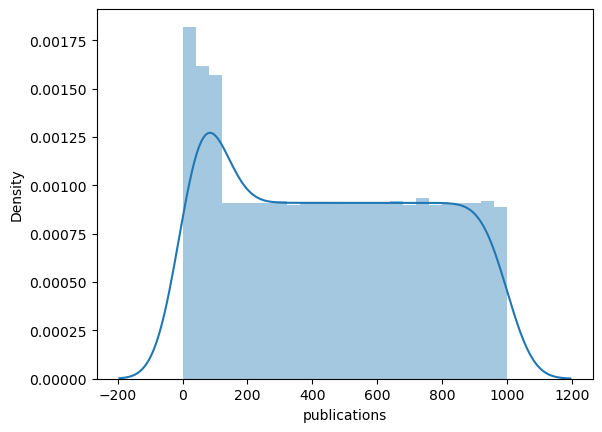

In [14]:
#Check for extreme values for the publications variable 
sns.distplot(CWUR_sub['publications'],bins=25)

Similar to the world rank density plot: there are a lot of universities (data values) that are between 0 and 100, with other data values ranging betwen 100 to 1000. 

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality_of_faculty', ylabel='Density'>

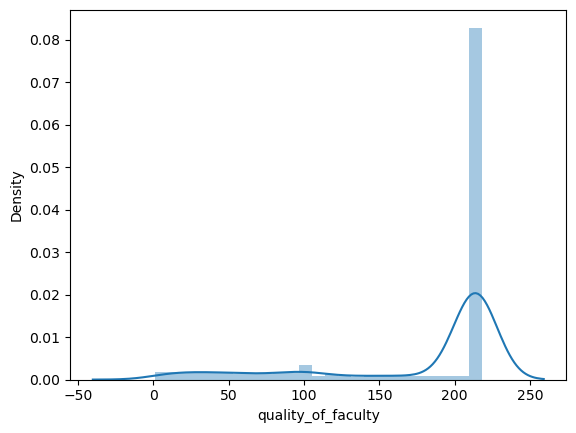

In [15]:
#Check for extreme values for the quality of faculty variable 
sns.distplot(CWUR_sub['quality_of_faculty'],bins=25)

There may be extreme or outliers present in the quality of faculty variable. I will continue with the regression as is and see the result prior to handling the possible outliers. 

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

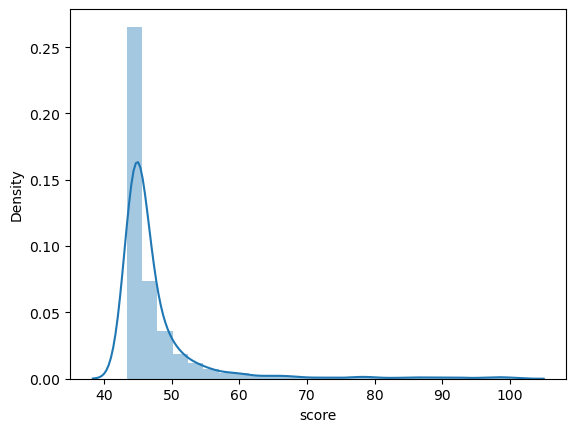

In [16]:
#Check for extreme values for the score variable 
sns.distplot(CWUR_sub['score'],bins=25)

There may be some extreme values present, however this density plot is not as concerning as the quality of faculty plot. 

# 5 Prepare data for regression analysis 
I will be doing the regression analysis for the world rank and publications variables first.

### Scatterplot

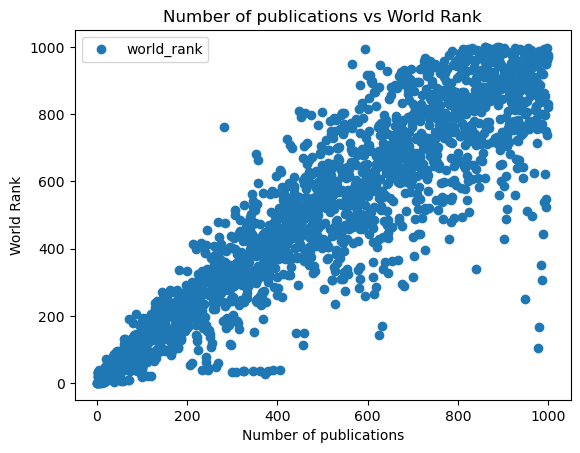

In [17]:
#Using matplotlib to create a scatterplot for the world rank and publications variables 
CWUR.plot(x='publications', y='world_rank', style='o')
plt.title('Number of publications vs World Rank')
plt.xlabel('Number of publications')
plt.ylabel('World Rank')
plt.show()

The general trend is positive (up and to the right) and linear. A lot of the data points are below 200 publications (which is what we saw above in the density plot for the number of publications). In the lower left quadrant (below 400 publications), some of the data supports the alternative hypothesis (that the number of publications DO AFFECT the world rank). 

### Prepare the independent and dependent variables 

In [19]:
#Reshape the variables into NumPy arrays and place them into separate objects 
#X = independent 
X = CWUR_sub['publications'].values.reshape(-1,1)

#y = dependent 
y = CWUR_sub['world_rank'].values.reshape(-1,1)

In [20]:
#Check the independent variable X
X

array([[  1],
       [ 12],
       [  4],
       ...,
       [830],
       [886],
       [861]], dtype=int64)

In [21]:
#Check the dependent variable y
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

### Split the data into a training set and test set 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 6 Regression Analysis

In [23]:
#Create a regression object 
regression = LinearRegression()

### Fit the model to the training set 

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

### Create a prediction for y on the test set

In [25]:
y_predicted = regression.predict(X_test)

### Create a plot that shows the regression line on the test set 

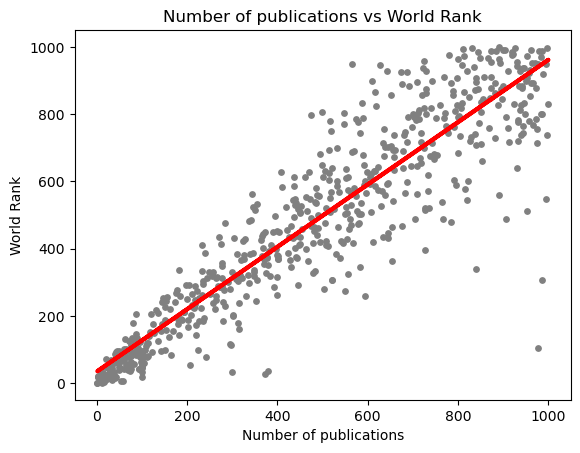

In [28]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Number of publications vs World Rank')
plot_test.ylabel('World Rank')
plot_test.xlabel('Number of publications')
plot_test.show()

### Write your own interpretation of how well the line appears to fit the data in a markdown cell. 
The world rank and the publications variables follow a positive linear trend. Majority of the data is condensed in the bottom left corner of the plot and there are some outliers present. For example, 1000 publications for a world ranking around 100. The data in the bottom left corner appears to fit the regression nicely, but as the number of publications increase, the fit becomes worse. 

### Model performance statistics

In [29]:
#Create objects for the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [30]:
#Print the model performance statistics 
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.92663174]]
Mean squared error 13689.22850008424
R2 score 0.8517912567513867


In [31]:
CWUR_sub.describe()

,world_rank,publications,quality_of_faculty,score
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,459.908636,178.888182,47.798395
std,304.320363,303.760352,64.050885,7.760806
min,1.000000,1.000000,1.000000,43.360000
25%,175.750000,175.750000,175.750000,44.460000
50%,450.500000,450.500000,210.000000,45.100000
75%,725.250000,725.000000,218.000000,47.545000
max,1000.000000,1000.000000,218.000000,100.000000


### Interpretation of the model performance statistics 
Slope (how the y variable changes when X changes)
- Positive slope of 0.93 indicates a positive relationship 
- As number of publications increases, the world rank will also increase 

Mean squared error (how close a regression line is to a set of points - accuracy) 
- MSE value of 13689.23
- The world rank has a range of 1 to 1000 and the publications variable has a range of 1 to 1000. 
- Since the MSE is very large (over 10,000), this means that the distance of the data points from the regression line is far. Therefore the regression line is not an accurate representation of the data. 

R2 score (how well the model explains the variance in the data)
- R2 score of 0.85 (or 85%)
- The R2 score indicates that the regression line is a good fit (closer to 1)
- 85% of the variance in the world rank values can be explained by the number of published articles 

### Compare the predicted y values with the actual y values in a dataframe 

In [32]:
#Create a dataframe comparing the ereal and predicted values of y 
data_compare = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})
data_compare.head(30)

,Actual,Predicted
0,121,139.595678
1,168,222.065903
2,92,147.935364
3,65,77.511352
4,529,557.506593
5,71,54.345558
6,366,330.481817
7,200,313.802446
8,247,236.892011
9,864,853.102119


### Some of the predicted values seem close to the actual. For example, if we look at indices 9, 14, 21, and 29. I thought that since a lot of the data values are below 200 publications, that the model may predict the values below 200 better. But I did not observe that; instead majority of the predicted values are very different from the actual values. I do not think this model does an accurate job at predicting the values (world rank). 

Impacts of possible bias: I could not think of potential impacts from bias. However, I was wondering how much of the data lies beyond 200 publications. It appears that majority of the data is below 200 publications, so is this a threshold? By exploring this threshold further I could potentially determine if the number of publications does affect the world rank below 200 publications -- or it is a more accurate predictor of world rank. 
    
Further steps: 
1. Look at other variables with a regression analysis: 
    - world rank and quality of faculty 
    - score and quality of faculty 
2. Explore the data below 200 publications only 
    - Do the number of publications affect the world rank, when the number of publications is below 200? 